Импорт необходимых модулей

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px

Чтение данных

In [196]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Столбцы таблицы:

1. RowNumber — номер строки таблицы
2. CustomerId — идентификатор клиента
3. Surname — фамилия клиента
4. CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
5. Geography — страна клиента (банк международный)
6. Gender — пол клиента
7. Age — возраст клиента
8. Tenure — сколько лет клиент пользуется услугами банка
9. Balance — баланс на счетах клиента в банке
10. NumOfProducts — количество услуг банка, которые приобрёл клиент
11. HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
12. IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
13. EstimatedSalary — предполагаемая заработная плата клиента
14. Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [197]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### 1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

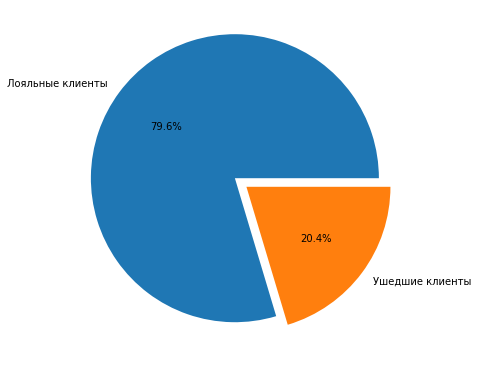

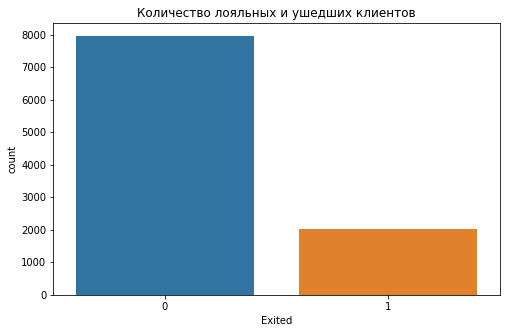

In [198]:
exited_people = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited_people,
    labels= ['Лояльные клиенты', 'Ушедшие клиенты'],
    autopct='%.1f%%',
    explode = [0.1, 0]
);

plt.figure(figsize=(8, 5))
sns.countplot(data=churn_data, x='Exited')
plt.title('Количество лояльных и ушедших клиентов')
plt.show()

#### Комментарий

Примерно четверть клиентов банка - ушедшие (около 2000 человек). Для объективной оценки этого показателя необходимо понимать рассматриваемый временной промежуток, а также средний показатель по рынку. Также рекомендуется рассмотреть динамику данного показателя по годам.

#### 2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

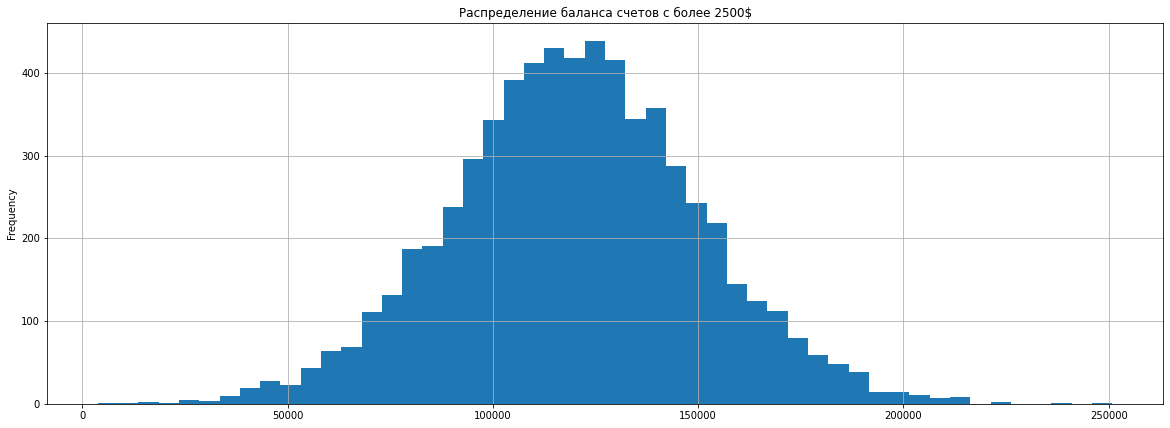

In [199]:
balance_filtred_df = churn_data[churn_data.Balance>2500]
balance_filtred_df['Balance'].plot(
    kind = 'hist',
    figsize=(20, 7),
    grid = True,
    bins = 50,
    title = 'Распределение баланса счетов с более 2500$'
);

#### Комментарий

График имеет вид нормального распределения с модальным значением в районе 120 тысяч долларов. Следовательно, некоторая часть клиентов банка использует счет не только для ежедневных расчетов, но и для для хранения сбережений.

#### 3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

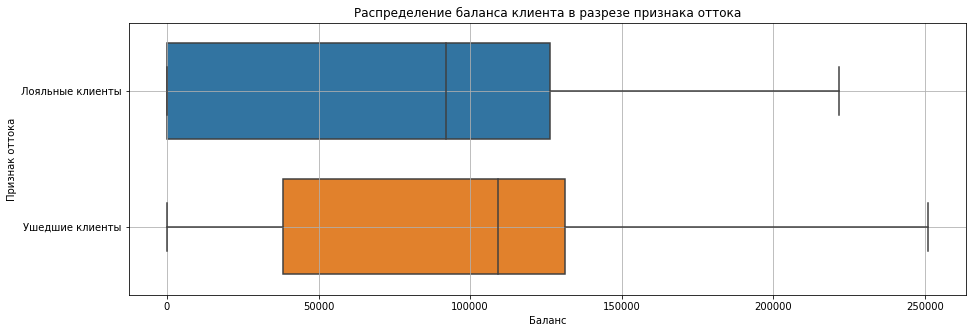

In [200]:
fig = plt.figure(figsize=(15, 5))
boxplot = sns.boxplot(
    data=churn_data, 
    y='Exited',
    x='Balance',
    orient='h',
    width=0.7
)
boxplot.set_title('Распределение баланса клиента в разрезе признака оттока');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('Признак оттока');
boxplot.set_yticks([0, 1], labels=['Лояльные клиенты', 'Ушедшие клиенты'])
boxplot.grid()

#### Комментарий

По диаграмме видно, что межквартильный размах баланса у ушедших клиентов меньше, чем у лояльных. 75-й квартиль, медианное значение и верхняя граница распределения баланса больше у ушедших клиентов. При этом у лояльных клиентов нижняя граница распределения баланса практически совпадает с 25-м квартилем. Это говорит о том, что среди лояльных клиентов много счетов с небольшими суммами и распределение баланса от 0$ до 75-ого квартиля равномерное. Таким образом, на счетах ушедших клиентов были большие суммы, по сравнению с лояльными клиентами. Возможно ушедших клиентов не устраивал процент на остаток счета. 

#### 4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

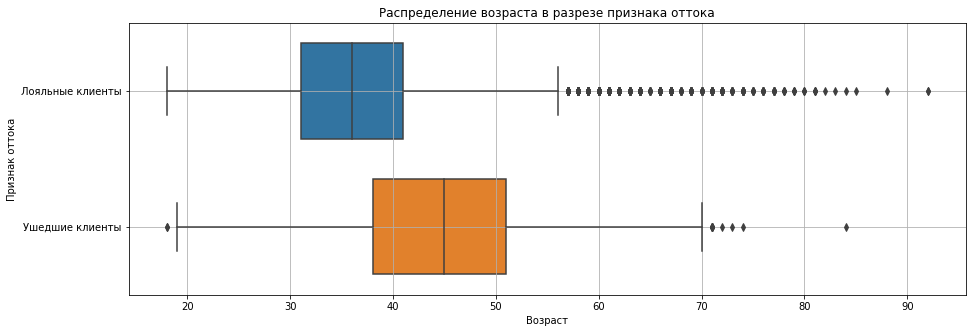

In [201]:
fig = plt.figure(figsize=(15, 5))
boxplot = sns.boxplot(
    data=churn_data, 
    y='Exited',
    x='Age',
    orient='h',
    width=0.7
)
boxplot.set_title('Распределение возраста в разрезе признака оттока');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Признак оттока');
boxplot.set_yticks([0, 1], labels=['Лояльные клиенты', 'Ушедшие клиенты'])
boxplot.grid()

#### Комментарий

На диаграмме видно, что большее количество выбросов у категории лояльных клиентов. Также, можно обратить внимание, что возраст лояльных клиентов меньше, чем у ушедших. Следовательно, есть связь между оттоком клиентом и их возрастом. Банку необходимо обратить на это внимание, разработать мероприятия по увеличению лояльности клиентов возраста от 38 лет.

#### 5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

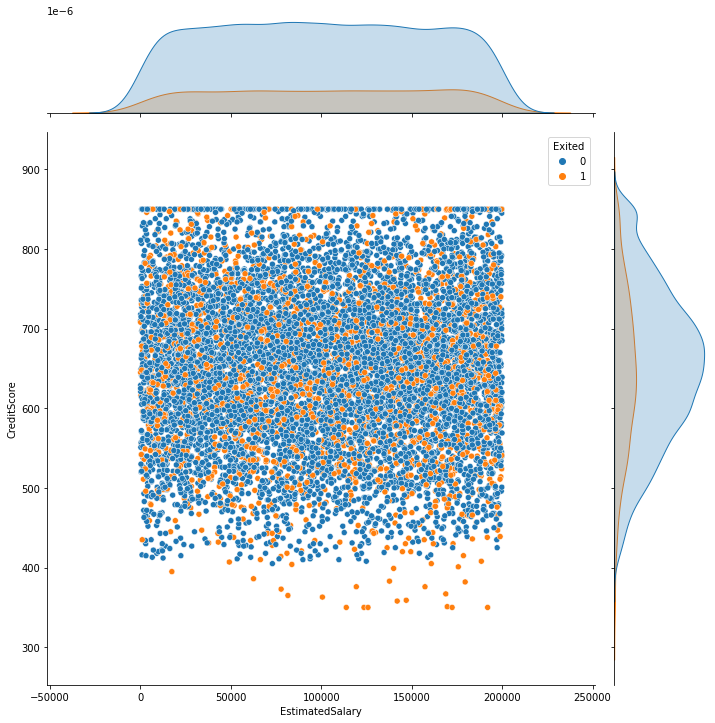

In [202]:
jointplot = sns.jointplot(
    data=churn_data, 
    x='EstimatedSalary', 
    y='CreditScore',
    hue='Exited',
    height=10,
)

#### Комментарий

Взаимосвязи кредитного рейтинга клиента и его предполагаемой зарплаты нет.

#### 6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Male      0.5457
Female    0.4543
Name: Gender, dtype: float64


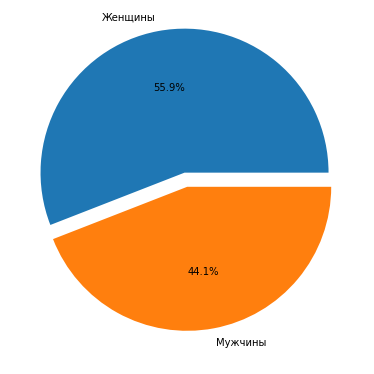

In [203]:
gender_counts = churn_data['Gender'].value_counts(normalize=True)
print(gender_counts)

mask = churn_data['Exited']==1
exited_filtred_gender_count = churn_data[mask]['Gender'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited_filtred_gender_count,
    labels= ['Женщины', 'Мужчины'],
    autopct='%.1f%%',
    explode = [0.1, 0]
);

#### Комментарий

По графику видно, что количество женщин в числе ушедших клиентов больше, чем мужчин. При этом соотношение общего числа мужчин и женщин среди клиентов банка примерно такое же, как и соотношение лояльных и ушедших. Следовательно, влияния гендера на отток клиентов нет.

#### 7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

   NumOfProducts  Exited  CustomerId
0              1       0        3675
1              1       1        1409
2              2       0        4242
3              2       1         348
4              3       0          46
5              3       1         220
6              4       1          60


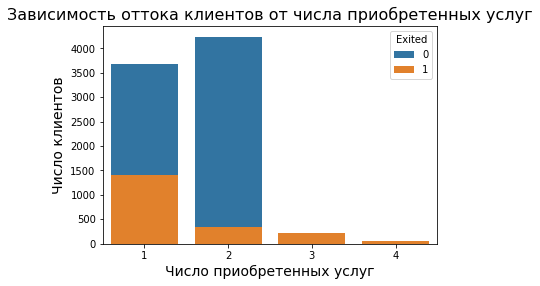

In [204]:
bar_data = churn_data.groupby(['NumOfProducts', 'Exited'], as_index=False).CustomerId.count()
print(bar_data)
barplot = sns.barplot(
    data=bar_data,
    x='NumOfProducts',
    y='CustomerId',
    hue='Exited',
    orient='v',
    ci=None,
    dodge=False
)
barplot.set_title('Зависимость оттока клиентов от числа приобретенных услуг', fontsize=16);
barplot.set_xlabel('Число приобретенных услуг', fontsize=14);
barplot.set_ylabel('Число клиентов', fontsize=14);
#barplot.grid()

#### Комментарий

По диаграмме видно, что лояльные клиенты приобретали в основном одну-две услуги (в соизмеримом соотношении), в то время, как ушедшие покупали услуги в 3-ий и 4-ый раз гораздо чаще, чем лояльные и чаще всего пользовались одной услугой. Таким образом, следует обратить внимание на клиентов, приобретающих более двух услуг.

#### 8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

   IsActiveMember  Exited  CustomerId
0               0       0        3547
1               0       1        1302
2               1       0        4416
3               1       1         735


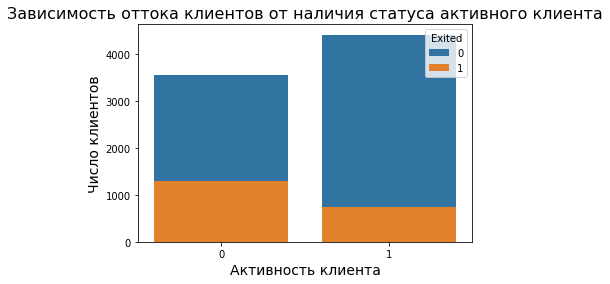

In [205]:
bar_data = churn_data.groupby(['IsActiveMember', 'Exited'], as_index=False).CustomerId.count()
print(bar_data)
barplot = sns.barplot(
    data=bar_data,
    x='IsActiveMember',
    y='CustomerId',
    hue='Exited',
    orient='v',
    ci=None,
    dodge=False
)
barplot.set_title('Зависимость оттока клиентов от наличия статуса активного клиента', fontsize=16);
barplot.set_xlabel('Активность клиента', fontsize=14);
barplot.set_ylabel('Число клиентов', fontsize=14);
#barplot.grid()

#### Комментарий

На графике видно, что активность клиента положительно влияет на отток. Следовательно, необходимо разработать мероприятия по повышению активности клиентов.

#### 9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [206]:
countries_grouped = churn_data.groupby('Geography')['Exited'].mean()
display(countries_grouped)
fig = px.choropleth(
    data_frame=countries_grouped, #DataFrame
    locations=countries_grouped.index, #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    range_color=[0, 0.4], #диапазон цвета
    title='Доля ушедших клиентов', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale=px.colors.sequential.Plasma #палитра цветов
)
fig.show()

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64

#### Комментарий

Из данных видно, что доли ушедших клиентов во Франции и Испании примерно равны. Однако в Германии это доля выше в два раза. Возможно это связано с неудовлетворительной работой подразделений в Германии.

#### 10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга. Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей. На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

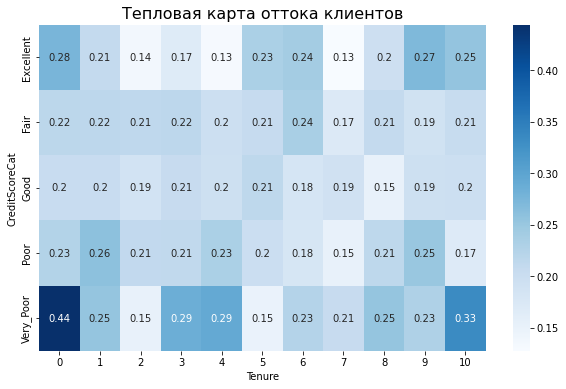

In [207]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

pivot = churn_data.pivot_table(
    values= 'Exited',
    index= 'CreditScoreCat',
    columns= 'Tenure',
    aggfunc= 'mean',
    fill_value=0
)

heatmap = plt.subplots(figsize=(10, 6))
heatmap = sns.heatmap(data=pivot, cmap='Blues', annot=True,)
heatmap.set_title('Тепловая карта оттока клиентов', fontsize=16);

#### Комментарий

Чаще других уходят клиенты с кредитным рейтингом Very_Poor, особенно в первый год "клиентства". Необходимо разработать меры по удержанию данной категории.

# Вывод:

Для уменьшения оттока клиентов требуется обратить внимание 
- на клиентов от 38-ми лет, 
- на клиентов с суммой на счету более 40-ка тыс. долларов, 
- на клиентов, приобретающих более 2-х услуг банка, 
- на клиентов с неактивным статусом,
- на клиентов из Германии (либо на сотрудников банка),
- на клиентов с кредитным рейтингом менее 500, особенно в первый год.